In [1]:
import json

from matplotlib import pyplot as plt
import pandas as pd
import pickle
import os
import numpy as np
import glob

c:\program files\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\program files\python36\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


## Consolidate Results For Distill Learning

In [2]:
DIR = "distill_results"
results_files = glob.glob(DIR+"/*")

In [3]:
def f_scores(scores):
    precision = scores[6]
    recall = scores[7]
    if precision + recall == 0.0:
        return [0.0, 0.0]
    f1 = (2 * precision * recall) / (precision + recall)
    beta = 0.5
    f05 = ((1 + beta) * precision * recall) / (beta * precision + recall)
    return [f1, f05]
    

In [4]:
# model,labeling,split_percent,pretrain,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
def load_distill_results(files) :
    data = []
    
    for f in files :
        r=pd.read_pickle(f)
        f_split = f.replace("distill_results\\","").split('.')[0].split('_')
        
        dataset = f_split[0]
        percent = f_split[1]
        arch = f_split[-1]
        loss = "adam" if f_split[-6] == "ADAM" else "sgd"
        model = "BEN" if f_split[2] == "BigEarthNet" else "CA_"+loss
        
        score = [model, dataset,percent, str(False), arch,]
        score.extend(r["student"])
        score.extend(f_scores(r["student"]))
        data.append(score)
    
    df = pd.DataFrame(data)
    df.columns = ["model", "labeling","split_percent","pretrain", "arch",
                  "loss","tp","fp","tn","fn","accuracy","precision","recall","auc","f1","f0.5"]
    df.split_percent = pd.to_numeric(df.split_percent, errors='coerce')
    return df


In [5]:
distill_df = load_distill_results(results_files)

In [6]:
# Sve out to file
# distill_df.sort_values(by=['model']).to_csv("distill_results.csv", index=False)

# distill_df[distill_df['model']=='BEN'].sort_values(by=['model']).to_csv("BEN_distill.csv", )
# distill_df[distill_df['model']=='CA_adam'].sort_values(by=['model']).to_csv("CA_adam_distill.csv", )
# distill_df[distill_df['model']=='CA_sgd'].sort_values(by=['model']).to_csv("CA_sgd_distill.csv", )

In [7]:
# load the consolidated results and graph the performance of balanced and extended labels
DIR = "."
df = pd.read_csv(os.path.join(DIR, 'distill_results.csv'))
df

,model,labeling,split_percent,pretrain,arch,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
0,BEN,balanced,100,False,InceptionV3,1.133638,1888.0,554.0,1475.0,147.0,0.827510,0.773137,0.927764,0.854284,0.843422,0.818615
1,BEN,balanced,1,False,Xception,4.162635,1729.0,720.0,1312.0,303.0,0.748278,0.706002,0.850886,0.753483,0.771703,0.748485
2,BEN,balanced,50,False,ResNet101V2,2.265687,1686.0,420.0,1610.0,348.0,0.811024,0.800570,0.828909,0.822655,0.814493,0.809798
3,BEN,balanced,50,False,InceptionV3,1.119305,1663.0,407.0,1624.0,370.0,0.808809,0.803382,0.818003,0.853656,0.810626,0.808197
4,BEN,expanded,25,False,Xception,10.634378,4872.0,1691.0,3801.0,612.0,0.790179,0.742343,0.888403,0.796555,0.808832,0.785384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,CA_sgd,expanded,25,False,ResNet50,2.249475,3868.0,864.0,4625.0,1619.0,0.773779,0.817413,0.704939,0.793926,0.757021,0.776135
176,CA_sgd,expanded,25,False,Xception,2.504368,3849.0,809.0,4680.0,1638.0,0.777059,0.826320,0.701476,0.789683,0.758797,0.780045
177,CA_sgd,expanded,10,False,ResNet101V2,2.302891,4559.0,975.0,4512.0,930.0,0.826439,0.823816,0.830570,0.840198,0.827180,0.826055
178,CA_sgd,expanded,1,False,Xception,3.675653,3401.0,865.0,4625.0,2085.0,0.731232,0.797234,0.619942,0.739194,0.697498,0.727850


In [8]:
_df = df[(df.labeling == 'balanced') & (df.arch == 'ResNet50') ]
_df

,model,labeling,split_percent,pretrain,arch,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
13,BEN,balanced,25,False,ResNet50,1.564306,1762.0,517.0,1517.0,268.0,0.806841,0.773146,0.867980,0.849553,0.817823,0.802368
14,BEN,balanced,1,False,ResNet50,3.974348,1732.0,757.0,1276.0,299.0,0.740157,0.695862,0.852782,0.777820,0.766372,0.741333
28,BEN,balanced,3,False,ResNet50,1.537248,1593.0,467.0,1565.0,439.0,0.777067,0.773301,0.783957,0.804246,0.778592,0.776821
35,BEN,balanced,100,False,ResNet50,2.245170,1883.0,556.0,1475.0,150.0,0.826280,0.772038,0.926217,0.844779,0.842129,0.817393
49,BEN,balanced,10,False,ResNet50,2.054284,1775.0,551.0,1483.0,255.0,0.801673,0.763113,0.874384,0.825639,0.814968,0.796917
51,BEN,balanced,50,False,ResNet50,0.987478,1642.0,415.0,1617.0,390.0,0.801919,0.798250,0.808071,0.840605,0.803130,0.801497
95,CA_adam,balanced,50,False,ResNet50,0.618671,1858.0,349.0,1683.0,174.0,0.871309,0.841867,0.914370,0.906597,0.876622,0.864722
99,CA_adam,balanced,25,False,ResNet50,0.823159,1818.0,298.0,1733.0,215.0,0.873770,0.859168,0.894245,0.896895,0.876356,0.870551
105,CA_adam,balanced,100,False,ResNet50,0.899869,1610.0,219.0,1811.0,424.0,0.841781,0.880262,0.791544,0.870721,0.833549,0.848559
109,CA_adam,balanced,10,False,ResNet50,0.916356,1800.0,404.0,1630.0,230.0,0.843996,0.816697,0.886699,0.871152,0.850260,0.838770


In [9]:
df2 = pd.read_csv(os.path.join(DIR, 'supervised_results.csv'))
df2 = df2.drop(['Unnamed: 0'], axis = 1)
df2

,model_type,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
0,supervised_baseline,100,False,InceptionV3,0.186335,1969.0,217.0,1788.0,26.0,0.939250,0.900732,0.986967,0.973556,0.941880,0.927752
1,supervised_baseline,100,False,ResNet101V2,0.186999,1953.0,222.0,1785.0,40.0,0.934500,0.897931,0.979930,0.973764,0.937140,0.923695
2,supervised_baseline,100,False,ResNet152,0.243032,1926.0,235.0,1795.0,108.0,0.915600,0.891254,0.946903,0.951272,0.918236,0.909062
3,supervised_baseline,100,False,ResNet50,0.186086,1947.0,209.0,1784.0,60.0,0.932750,0.903061,0.970105,0.970995,0.935383,0.924355
4,supervised_baseline,100,False,Xception,0.170726,1983.0,222.0,1776.0,19.0,0.939750,0.899320,0.990510,0.976170,0.942715,0.927792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,supervised_baseline_pretrained_ex,50,True,InceptionV3,0.427894,4975.0,1561.0,3929.0,511.0,0.811224,0.761169,0.906854,0.891291,0.827649,0.804235
116,supervised_baseline_pretrained_ex,50,True,ResNet101V2,0.379863,4707.0,1044.0,4447.0,778.0,0.834001,0.818466,0.858159,0.909031,0.837843,0.831283
117,supervised_baseline_pretrained_ex,50,True,ResNet152,0.515150,4587.0,1462.0,4027.0,900.0,0.784803,0.758307,0.835976,0.863440,0.795250,0.782542
118,supervised_baseline_pretrained_ex,50,True,ResNet50,0.604424,4641.0,1410.0,4082.0,843.0,0.794734,0.766981,0.846280,0.863395,0.804681,0.791709


In [10]:
_df2 = df2[(df2.model_type.isin(['supervised_baseline'])) & 
           (df2.architecture == 'ResNet152') &
           (df2.pretrain == False)]
_df2 = _df2.rename(columns = {'model_type' : 'model'})
_df2['model'] = 'supervised'
_df2

,model,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
2,supervised,100,False,ResNet152,0.243032,1926.0,235.0,1795.0,108.0,0.915600,0.891254,0.946903,0.951272,0.918236,0.909062
7,supervised,10,False,ResNet152,0.303365,1907.0,341.0,1692.0,124.0,0.885581,0.848310,0.938946,0.939483,0.891330,0.876513
12,supervised,1,False,ResNet152,0.455079,1349.0,221.0,1809.0,685.0,0.777067,0.859236,0.663225,0.902077,0.748613,0.782180
17,supervised,25,False,ResNet152,0.274974,2021.0,361.0,1668.0,14.0,0.907726,0.848447,0.993120,0.947509,0.915101,0.891749
22,supervised,3,False,ResNet152,0.439815,1425.0,162.0,1871.0,606.0,0.811024,0.897921,0.701625,0.919590,0.787728,0.821326
27,supervised,50,False,ResNet152,0.193318,1986.0,210.0,1820.0,48.0,0.936516,0.904372,0.976401,0.964253,0.939007,0.927171


In [11]:
def plot_results(plot_df, xlab, ylab, title = None):
    _title = "Accuracy for different CNN Architectures" if not title else title
    
    plot_df.plot(kind="bar", figsize=(6,4), #marker = '.',
                 rot=90, ylim=(0.4, 1.0), fontsize=10)
    plt.title(_title, fontsize=10)
    plt.legend(fontsize=8, loc = 'lower right')
    plt.xlabel(xlab, fontsize=10)
    plt.ylabel(ylab, fontsize=10)
    
def convert_to_plot(df, score, series, xlbl):
    
    plot_df = df[[score, series, xlbl]]
    #print(plot_df)
    plot_df = plot_df.pivot(
        index= xlbl, 
        columns= series, 
        values= score
    ).sort_values(xlbl, ascending=True)
    return plot_df

def display_results(dataframe, title):
    display(dataframe)
    plot_df = convert_to_plot(dataframe, 'accuracy', "model", "split_percent",)
    plot_results(plot_df, "Split Percentage", "accuracy", f'Accuracy for {title}')
    #plt.savefig(f"{model_type}.png")
    
    plot_df = convert_to_plot(dataframe, 'f1' , "model", "split_percent")
    plot_results(plot_df, "Split Percentage", "f1",
                         f'F1 score for {title}')

In [12]:
# also get information for pretrained supervised
_df3 = df2[(df2.model_type.isin(['supervised_baseline_pretrained'])) & 
           (df2.architecture == 'ResNet152') &
           (df2.pretrain == True)]
_df3 = _df3.rename(columns = {'model_type' : 'model'})
_df3['model'] = 'supervised_pretrained'
_df3

,model,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5
62,supervised_pretrained,100,True,ResNet152,0.438497,1593.0,304.0,1727.0,440.0,0.816929,0.839747,0.783571,0.903257,0.810687,0.820148
67,supervised_pretrained,10,True,ResNet152,0.759526,1162.0,246.0,1787.0,869.0,0.725640,0.825284,0.572132,0.851404,0.675778,0.719208
72,supervised_pretrained,1,True,ResNet152,1.299277,1111.0,278.0,1753.0,922.0,0.704724,0.799856,0.546483,0.804429,0.649328,0.692787
77,supervised_pretrained,25,True,ResNet152,0.524251,1800.0,623.0,1409.0,232.0,0.789616,0.742881,0.885827,0.872730,0.808081,0.785112
82,supervised_pretrained,3,True,ResNet152,0.645926,1506.0,446.0,1586.0,526.0,0.760827,0.771516,0.741142,0.843999,0.756024,0.761119
87,supervised_pretrained,50,True,ResNet152,0.457285,1467.0,291.0,1746.0,560.0,0.790600,0.834471,0.723730,0.889169,0.775165,0.793974


In [13]:
# merge the supervised dataset with the simclr results for common graphing
new_data = pd.concat([_df2, _df, _df3])
new_data

,model,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5,labeling,arch
2,supervised,100,False,ResNet152,0.243032,1926.0,235.0,1795.0,108.0,0.915600,0.891254,0.946903,0.951272,0.918236,0.909062,NaN,NaN
7,supervised,10,False,ResNet152,0.303365,1907.0,341.0,1692.0,124.0,0.885581,0.848310,0.938946,0.939483,0.891330,0.876513,NaN,NaN
12,supervised,1,False,ResNet152,0.455079,1349.0,221.0,1809.0,685.0,0.777067,0.859236,0.663225,0.902077,0.748613,0.782180,NaN,NaN
17,supervised,25,False,ResNet152,0.274974,2021.0,361.0,1668.0,14.0,0.907726,0.848447,0.993120,0.947509,0.915101,0.891749,NaN,NaN
22,supervised,3,False,ResNet152,0.439815,1425.0,162.0,1871.0,606.0,0.811024,0.897921,0.701625,0.919590,0.787728,0.821326,NaN,NaN
27,supervised,50,False,ResNet152,0.193318,1986.0,210.0,1820.0,48.0,0.936516,0.904372,0.976401,0.964253,0.939007,0.927171,NaN,NaN
13,BEN,25,False,NaN,1.564306,1762.0,517.0,1517.0,268.0,0.806841,0.773146,0.867980,0.849553,0.817823,0.802368,balanced,ResNet50
14,BEN,1,False,NaN,3.974348,1732.0,757.0,1276.0,299.0,0.740157,0.695862,0.852782,0.777820,0.766372,0.741333,balanced,ResNet50
28,BEN,3,False,NaN,1.537248,1593.0,467.0,1565.0,439.0,0.777067,0.773301,0.783957,0.804246,0.778592,0.776821,balanced,ResNet50
35,BEN,100,False,NaN,2.245170,1883.0,556.0,1475.0,150.0,0.826280,0.772038,0.926217,0.844779,0.842129,0.817393,balanced,ResNet50


,model,split_percent,pretrain,architecture,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,f1,f0.5,labeling,arch
2,supervised,100,False,ResNet152,0.243032,1926.0,235.0,1795.0,108.0,0.915600,0.891254,0.946903,0.951272,0.918236,0.909062,NaN,NaN
7,supervised,10,False,ResNet152,0.303365,1907.0,341.0,1692.0,124.0,0.885581,0.848310,0.938946,0.939483,0.891330,0.876513,NaN,NaN
12,supervised,1,False,ResNet152,0.455079,1349.0,221.0,1809.0,685.0,0.777067,0.859236,0.663225,0.902077,0.748613,0.782180,NaN,NaN
17,supervised,25,False,ResNet152,0.274974,2021.0,361.0,1668.0,14.0,0.907726,0.848447,0.993120,0.947509,0.915101,0.891749,NaN,NaN
22,supervised,3,False,ResNet152,0.439815,1425.0,162.0,1871.0,606.0,0.811024,0.897921,0.701625,0.919590,0.787728,0.821326,NaN,NaN
27,supervised,50,False,ResNet152,0.193318,1986.0,210.0,1820.0,48.0,0.936516,0.904372,0.976401,0.964253,0.939007,0.927171,NaN,NaN
13,BEN,25,False,NaN,1.564306,1762.0,517.0,1517.0,268.0,0.806841,0.773146,0.867980,0.849553,0.817823,0.802368,balanced,ResNet50
14,BEN,1,False,NaN,3.974348,1732.0,757.0,1276.0,299.0,0.740157,0.695862,0.852782,0.777820,0.766372,0.741333,balanced,ResNet50
28,BEN,3,False,NaN,1.537248,1593.0,467.0,1565.0,439.0,0.777067,0.773301,0.783957,0.804246,0.778592,0.776821,balanced,ResNet50
35,BEN,100,False,NaN,2.245170,1883.0,556.0,1475.0,150.0,0.826280,0.772038,0.926217,0.844779,0.842129,0.817393,balanced,ResNet50


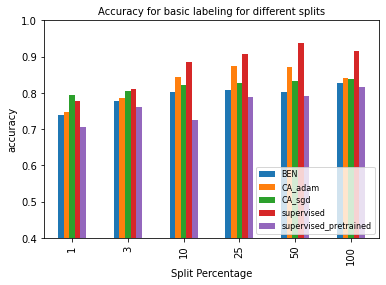

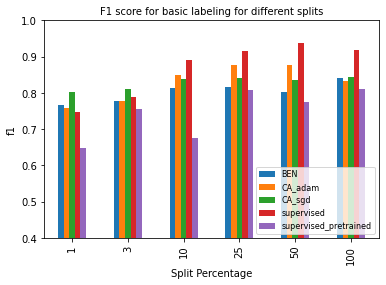

In [14]:
display_results(new_data, 'basic labeling for different splits')